# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [260]:
# %pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [261]:
# %pip install --upgrade plotly

In [262]:
# %pip install geocoder

### Import Statements

In [263]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import geocoder

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [264]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [265]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [266]:
df_data.shape

(4324, 9)

In [267]:
df_data.describe()

,Unnamed: 0,Unnamed: 0.1
count,"4,324.00","4,324.00"
mean,"2,161.50","2,161.50"
std,"1,248.38","1,248.38"
min,0.00,0.00
25%,"1,080.75","1,080.75"
50%,"2,161.50","2,161.50"
75%,"3,242.25","3,242.25"
max,"4,323.00","4,323.00"


In [268]:
df_data.isna().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False,  True, False]])

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [269]:
df_data_clean = df_data.dropna()

In [270]:
df_data_clean.describe()

,Unnamed: 0,Unnamed: 0.1
count,964.00,964.00
mean,858.49,858.49
std,784.21,784.21
min,0.00,0.00
25%,324.75,324.75
50%,660.50,660.50
75%,"1,112.00","1,112.00"
max,"4,020.00","4,020.00"


In [271]:
duplicated_rows = df_data_clean[df_data_clean.duplicated()]

In [272]:
duplicated_rows

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status


## Descriptive Statistics

In [273]:
df_data_clean.describe()

,Unnamed: 0,Unnamed: 0.1
count,964.00,964.00
mean,858.49,858.49
std,784.21,784.21
min,0.00,0.00
25%,324.75,324.75
50%,660.50,660.50
75%,"1,112.00","1,112.00"
max,"4,020.00","4,020.00"


In [274]:
df_data_clean.head()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

<AxesSubplot:xlabel='count', ylabel='Organisation'>

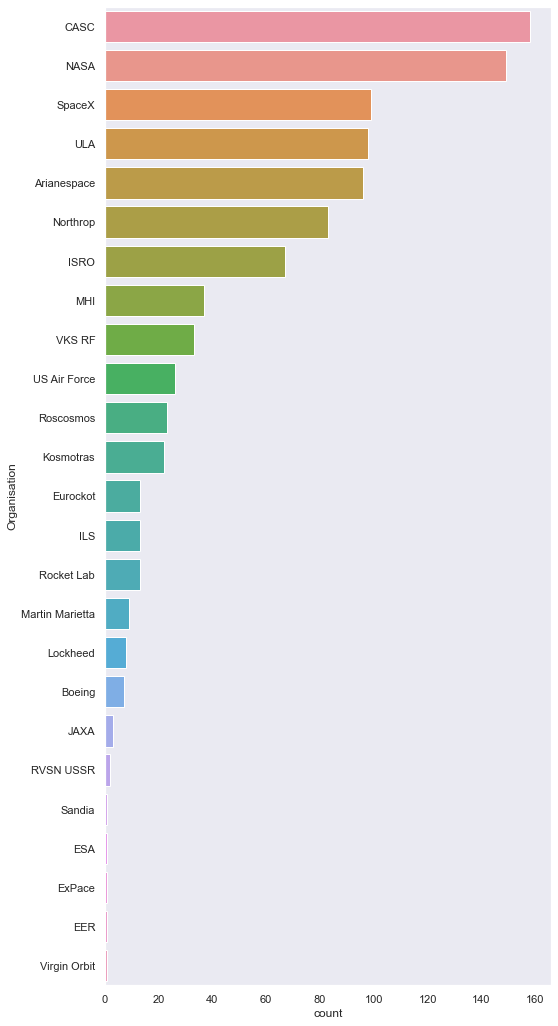

In [275]:
plt.figure(figsize=(8,18))
sns.countplot(y="Organisation", data=df_data_clean, order=df_data_clean["Organisation"].value_counts().index)

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [276]:
df_data_clean.groupby('Rocket_Status').count()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Price,Mission_Status
Rocket_Status,,,,,,,,
StatusActive,586,586,586,586,586,586,586,586
StatusRetired,378,378,378,378,378,378,378,378


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [277]:
df_data_clean.groupby('Mission_Status').count()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price
Mission_Status,,,,,,,,
Failure,36,36,36,36,36,36,36,36
Partial Failure,17,17,17,17,17,17,17,17
Prelaunch Failure,1,1,1,1,1,1,1,1
Success,910,910,910,910,910,910,910,910


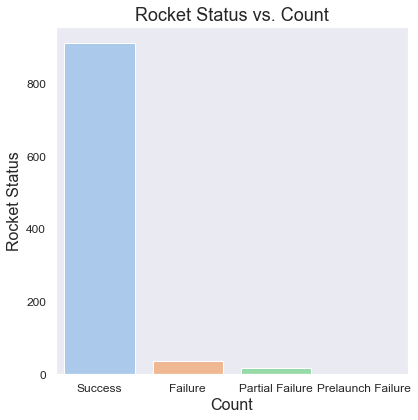

In [278]:
plt.figure(figsize=(6,6))
ax = sns.countplot(x="Mission_Status", data=df_data_clean, order=df_data_clean["Mission_Status"].value_counts().index, palette="pastel")
ax.axes.set_title("Rocket Status vs. Count",fontsize=18)
ax.set_xlabel("Count",fontsize=16)
ax.set_ylabel("Rocket Status",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [279]:
df_data_clean['Price'] = df_data_clean['Price'].str.replace(',', '').astype(float)

<ipython-input-279-80f6f7c581f1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



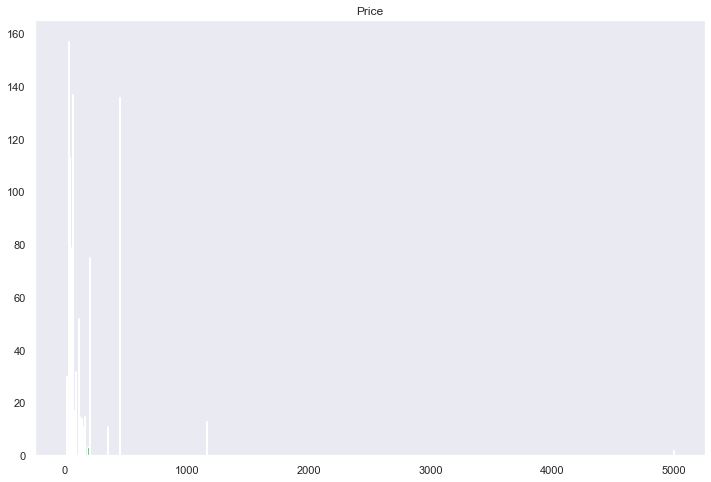

In [280]:
ax = df_data_clean.hist(column='Price', bins=500, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

In [281]:
df_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 4020
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      964 non-null    int64  
 1   Unnamed: 0.1    964 non-null    int64  
 2   Organisation    964 non-null    object 
 3   Location        964 non-null    object 
 4   Date            964 non-null    object 
 5   Detail          964 non-null    object 
 6   Rocket_Status   964 non-null    object 
 7   Price           964 non-null    float64
 8   Mission_Status  964 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 107.6+ KB


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [282]:
df_data_clean['country']= [country[-1] for country in df_data_clean['Location'].str.split(",")]
country_launches = df_data_clean.groupby(['country'], as_index=False).agg({'Location': pd.Series.count})

<ipython-input-282-63a709a6c33e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [283]:
country_launches.loc[country_launches['country'] == ' China',['country']] = 'China'
country_launches.loc[country_launches['country'] == ' France',['country']] = 'France'
country_launches.loc[country_launches['country'] == ' Gran Canaria',['country']] = 'USA'
country_launches.loc[country_launches['country'] == ' India',['country']] = 'India'
country_launches.loc[country_launches['country'] == ' Japan',['country']] = 'Japan'
country_launches.loc[country_launches['country'] == ' Kazakhstan',['country']] = 'Kazakhstan'
country_launches.loc[country_launches['country'] == ' New Zealand',['country']] = 'New Zealand'
country_launches.loc[country_launches['country'] == ' Pacific Missile Range Facility',['country']] = 'IR'
country_launches.loc[country_launches['country'] == ' Yellow Sea',['country']] = 'China'
country_launches.loc[country_launches['country'] == ' Russia',['country']] = 'Russian Federation'
country_launches.loc[country_launches['country'] == ' USA',['country']] = 'USA'

In [284]:
country_launches

,country,Location
0,China,158
1,France,95
2,USA,2
3,India,67
4,Japan,40
5,Kazakhstan,46
6,New Zealand,13
7,IR,1
8,Russian Federation,54
9,USA,487


In [285]:
for i in range(0,len(country_launches['country'])):
    country_launches.loc[i, 'Alpha3'] = countries.get(country_launches['country'][i]).alpha3

In [286]:
country_launches

,country,Location,Alpha3
0,China,158,CHN
1,France,95,FRA
2,USA,2,USA
3,India,67,IND
4,Japan,40,JPN
5,Kazakhstan,46,KAZ
6,New Zealand,13,NZL
7,IR,1,IRN
8,Russian Federation,54,RUS
9,USA,487,USA


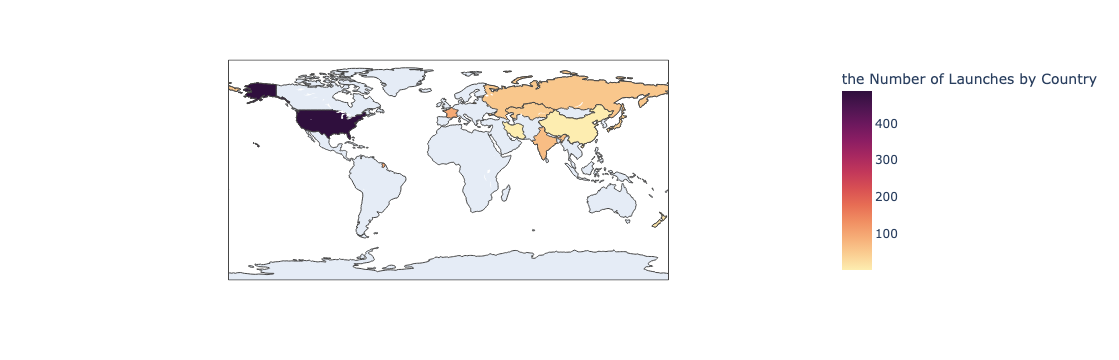

In [287]:
fig = px.choropleth(country_launches, locations='Alpha3', color='Location',
                           color_continuous_scale="Matter",
                           labels={'Location':'the Number of Launches by Country'}
                          )

fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [288]:
df_failure = df_data_clean[df_data_clean['Mission_Status'] == 'Failure']

In [289]:
country_failures = df_failure.groupby(['country'], as_index=False).agg({'Mission_Status': pd.Series.count})

In [290]:
country_failures.loc[country_failures['country'] == ' China',['country']] = 'China'
country_failures.loc[country_failures['country'] == ' France',['country']] = 'France'
country_failures.loc[country_failures['country'] == ' Gran Canaria',['country']] = 'USA'
country_failures.loc[country_failures['country'] == ' India',['country']] = 'India'
country_failures.loc[country_failures['country'] == ' Japan',['country']] = 'Japan'
country_failures.loc[country_failures['country'] == ' Kazakhstan',['country']] = 'Kazakhstan'
country_failures.loc[country_failures['country'] == ' New Zealand',['country']] = 'New Zealand'
country_failures.loc[country_failures['country'] == ' Pacific Missile Range Facility',['country']] = 'IR'
country_failures.loc[country_failures['country'] == ' Yellow Sea',['country']] = 'China'
country_failures.loc[country_failures['country'] == ' Russia',['country']] = 'Russian Federation'
country_failures.loc[country_failures['country'] == ' USA',['country']] = 'USA'

In [291]:
for i in range(0,len(country_failures['country'])):
    country_failures.loc[i, 'Alpha3'] = countries.get(country_failures['country'][i]).alpha3

In [292]:
country_failures

,country,Mission_Status,Alpha3
0,China,4,CHN
1,France,2,FRA
2,India,5,IND
3,Kazakhstan,2,KAZ
4,New Zealand,2,NZL
5,IR,1,IRN
6,Russian Federation,1,RUS
7,USA,19,USA


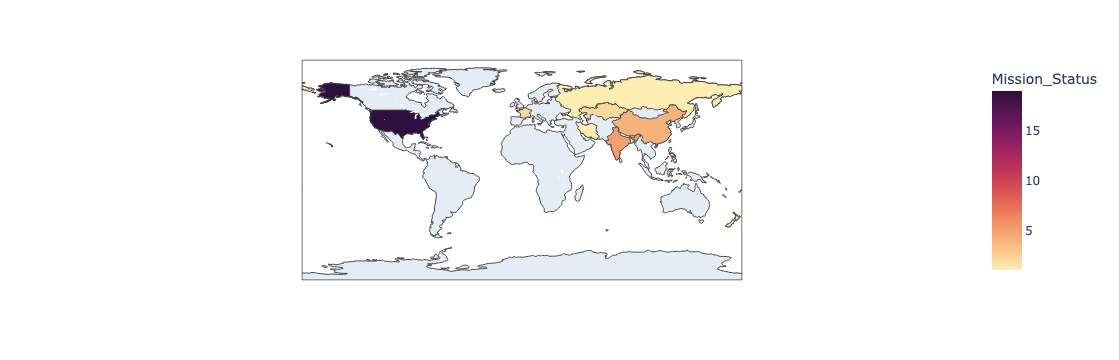

In [293]:
fig = px.choropleth(country_failures, locations='Alpha3', color='Mission_Status',
                           color_continuous_scale="Matter",
                           labels={'Location':'the Number of failed missions'}
                          )

fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [294]:
df_data_clean.head()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China


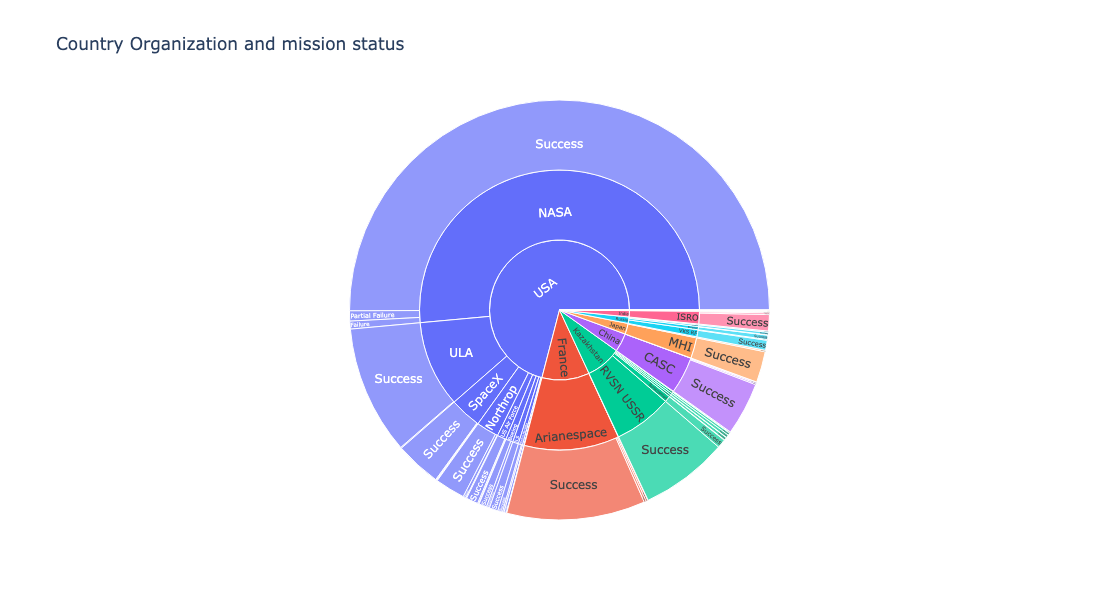

In [295]:
fig = px.sunburst(df_data_clean, path=['country', 'Organisation','Mission_Status'], values='Price', 
                  labels= 'Organisation', title=f"Country Organization and mission status", width=800, height=600)
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [296]:
organizations_spend = df_data_clean.groupby(['Organisation'], as_index=False).agg({'Price': pd.Series.sum})

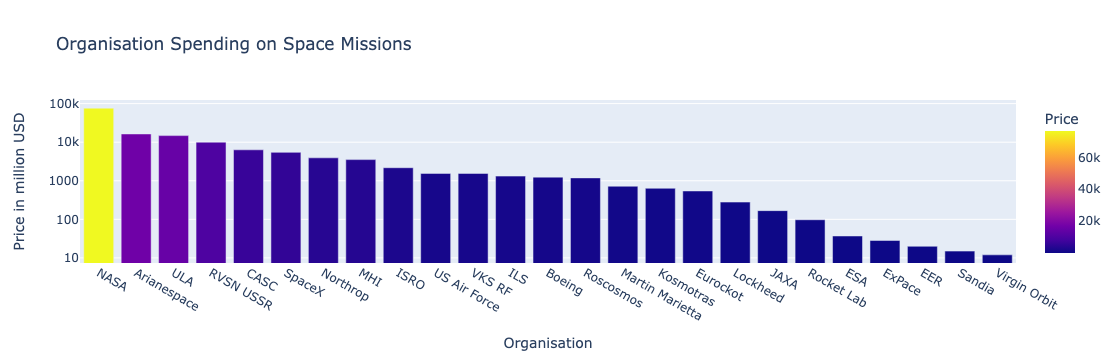

In [297]:
g_bar = px.bar(organizations_spend,
               x='Organisation',
               y='Price',
               title='Organisation Spending on Space Missions',
               color='Price',
               barmode='group')

g_bar.update_layout(xaxis_title='Organisation',
                    yaxis_title='Price in million USD',
                    xaxis={'categoryorder':'total descending'},
                    yaxis=dict(type='log'))
g_bar.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [298]:
organizations_spend = df_data_clean.groupby(['Organisation'], as_index=False).agg({'Price': pd.Series.sum})

In [299]:
organizations_launch = df_data_clean.groupby(['Organisation'], as_index=False).agg({'Organisation': pd.Series.count})

In [300]:
organizations_spend['Launches'] = organizations_launch

In [301]:
organizations_spend['Amount per launch'] = organizations_spend['Price'] / organizations_spend['Launches']

In [302]:
organizations_spend

,Organisation,Price,Launches,Amount per launch
0,Arianespace,"16,345.00",96,170.26
1,Boeing,"1,241.00",7,177.29
2,CASC,"6,340.26",158,40.13
3,EER,20.00,1,20.00
4,ESA,37.00,1,37.00
5,Eurockot,543.40,13,41.80
6,ExPace,28.30,1,28.30
7,ILS,"1,320.00",13,101.54
8,ISRO,"2,177.00",67,32.49
9,JAXA,168.00,3,56.00


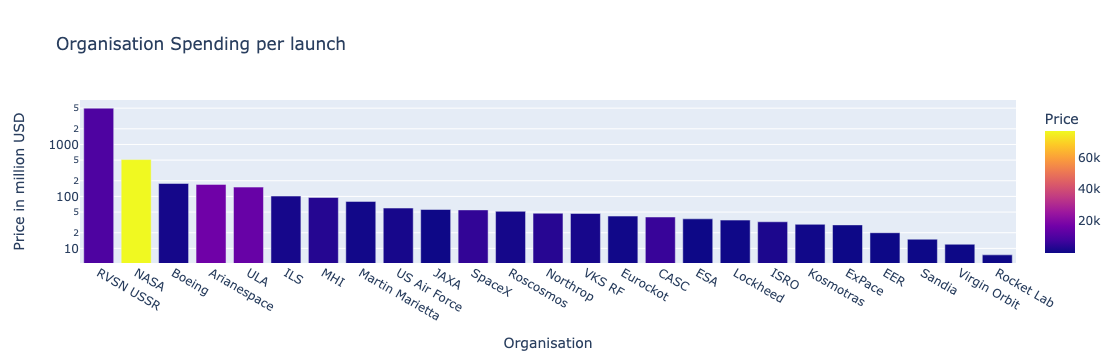

In [303]:
g_bar = px.bar(organizations_spend,
               x='Organisation',
               y='Amount per launch',
               title='Organisation Spending per launch',
               color='Price',
               barmode='group')

g_bar.update_layout(xaxis_title='Organisation',
                    yaxis_title='Price in million USD',
                    xaxis={'categoryorder':'total descending'},
                    yaxis=dict(type='log'))
g_bar.show()

# Chart the Number of Launches per Year

In [304]:
df_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 4020
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      964 non-null    int64  
 1   Unnamed: 0.1    964 non-null    int64  
 2   Organisation    964 non-null    object 
 3   Location        964 non-null    object 
 4   Date            964 non-null    object 
 5   Detail          964 non-null    object 
 6   Rocket_Status   964 non-null    object 
 7   Price           964 non-null    float64
 8   Mission_Status  964 non-null    object 
 9   country         964 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 115.1+ KB


In [305]:
df_data_clean.loc[:,["Date"]]= pd.to_datetime(df_data_clean['Date'], utc=True)

/Users/JoeSadek/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [306]:
df_data_clean['Year'] = df_data_clean["Date"].dt.year

<ipython-input-306-b37fc73cd9ac>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [307]:
df_missions_year = df_data_clean.groupby(['Year'], as_index=False).agg({'Mission_Status': pd.Series.count})

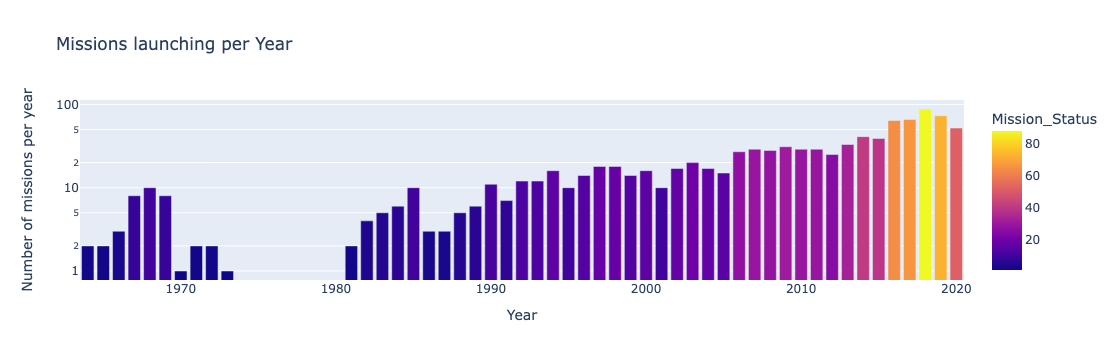

In [308]:
g_bar = px.bar(df_missions_year,
               x='Year',
               y='Mission_Status',
               title='Missions launching per Year',
               color='Mission_Status',
               barmode='group')

g_bar.update_layout(xaxis_title='Year',
                    yaxis_title='Number of missions per year',
                    xaxis={'categoryorder':'total descending'},
                    yaxis=dict(type='log'))
g_bar.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [309]:
df_data_clean['Month'] = df_data_clean["Date"].dt.month

<ipython-input-309-e224716b66a1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [310]:
df_missions_month = df_data_clean.groupby(['Year','Month'], as_index=False).agg({'Mission_Status': pd.Series.count})
df_missions_month

,Year,Month,Mission_Status
0,1964,9,1
1,1964,12,1
2,1965,2,1
3,1965,5,1
4,1966,7,1
...,...,...,...
383,2020,4,4
384,2020,5,6
385,2020,6,7
386,2020,7,12


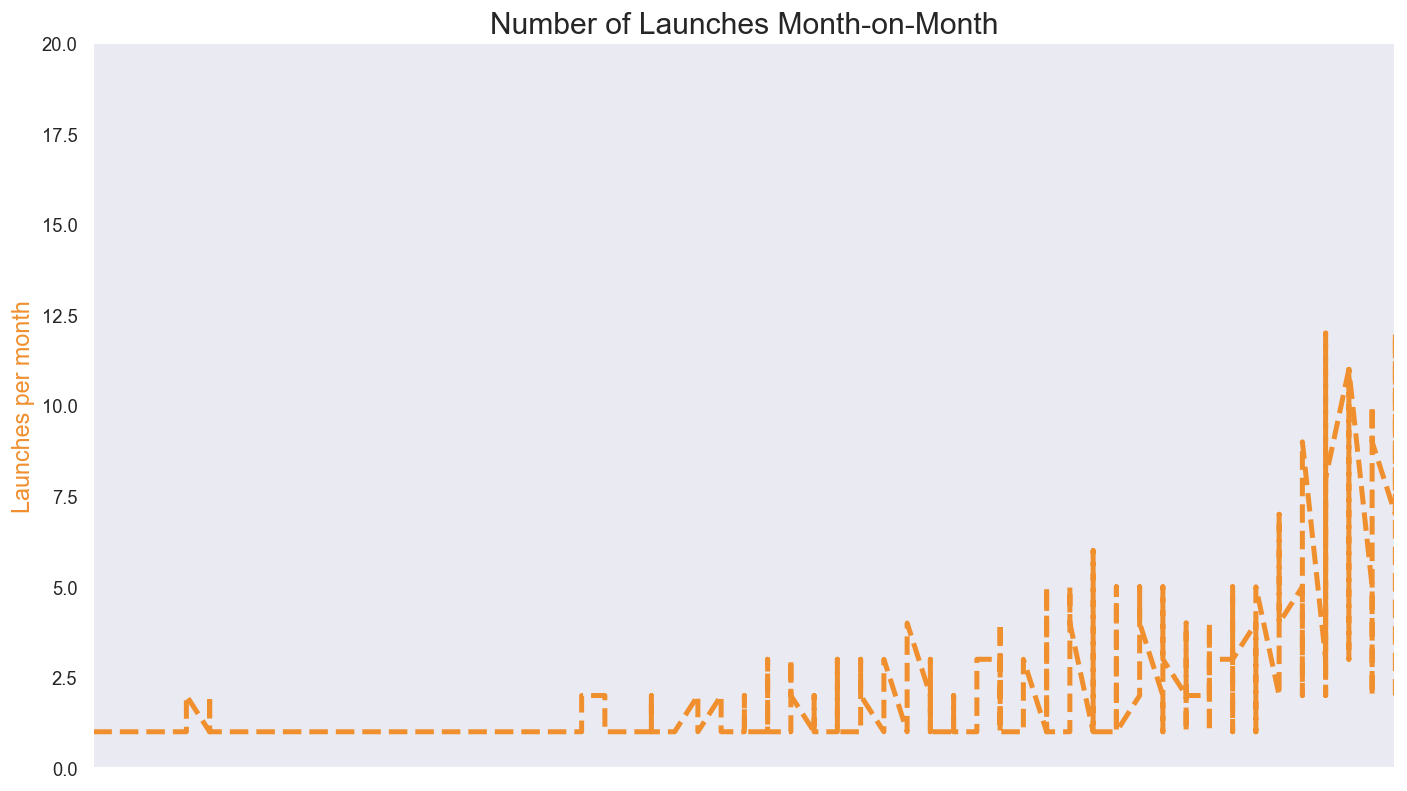

In [311]:
plt.figure(figsize=(14,8), dpi=120)

plt.title('Number of Launches Month-on-Month', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
# ax2 = ax1.twinx()

ax1.set_ylabel('Launches per month', color='#F08F2E', fontsize=14)
# ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom=0, top=20)
ax1.set_xlim([df_missions_month.Year.min(), df_missions_month.Year.max()])

# Experiment with the linestyle and markers
ax1.plot(df_missions_month.Year, df_missions_month.Mission_Status, 
         color='#F08F2E', linewidth=3, linestyle='--')
# ax2.plot(df_btc_monthly.index, df_btc_search.BTC_NEWS_SEARCH, 
#          color='skyblue', linewidth=3, marker='o')

plt.show()

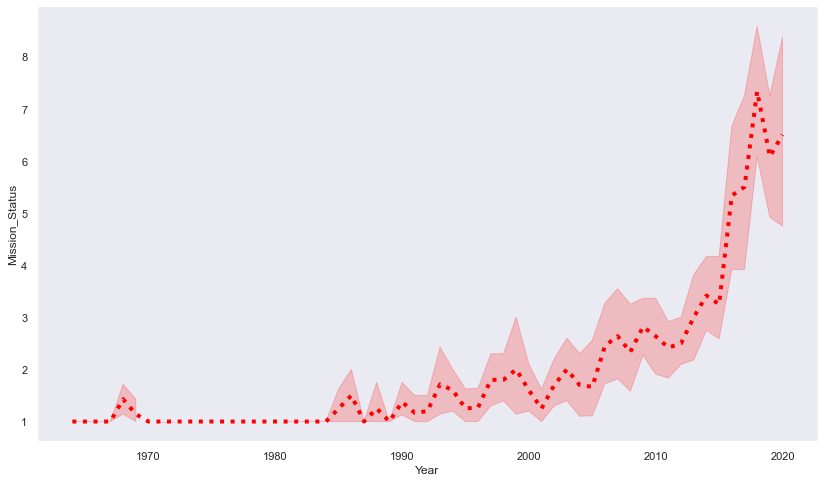

In [312]:
sns.set_theme(style="dark")

plt.figure (figsize = (14, 8))
sns.lineplot (x = 'Year', y = 'Mission_Status', data = df_missions_month, linewidth = 4, color = 'red', linestyle = 'dotted')
plt.show ()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [313]:
df_popular_month = df_data_clean.groupby(['Month'], as_index=False).agg({'Mission_Status': pd.Series.count})

In [314]:
df_popular_month

,Month,Mission_Status
0,1,66
1,2,60
2,3,77
3,4,91
4,5,86
5,6,85
6,7,77
7,8,82
8,9,88
9,10,83


# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

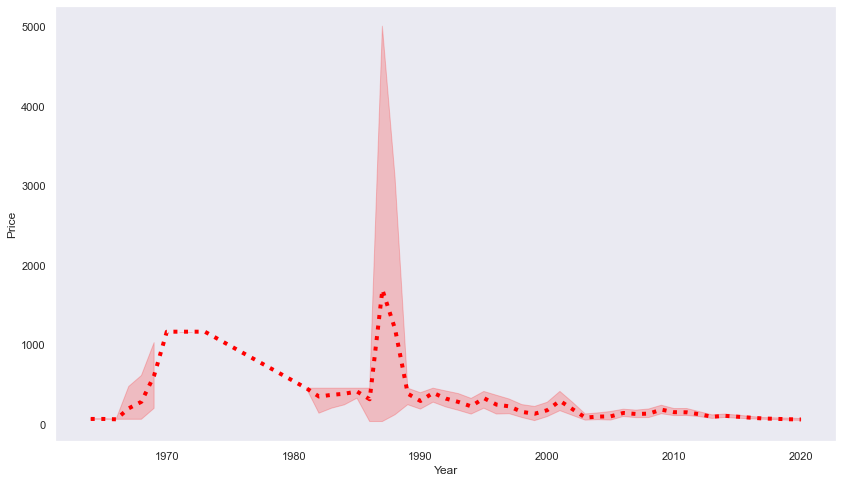

In [315]:
sns.set_theme(style="dark")

plt.figure (figsize = (14, 8))
sns.lineplot (x = 'Year', y = 'Price', data = df_data_clean, linewidth = 4, color = 'red', linestyle = 'dotted')
plt.show ()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [316]:
df_organization_month = df_data_clean.groupby(['Year','Month','Organisation'], as_index=False).agg({'Mission_Status': pd.Series.count})

In [317]:
df_organization_month

,Year,Month,Organisation,Mission_Status
0,1964,9,US Air Force,1
1,1964,12,US Air Force,1
2,1965,2,US Air Force,1
3,1965,5,US Air Force,1
4,1966,7,US Air Force,1
...,...,...,...,...
826,2020,7,Roscosmos,2
827,2020,7,SpaceX,1
828,2020,7,ULA,1
829,2020,8,CASC,1


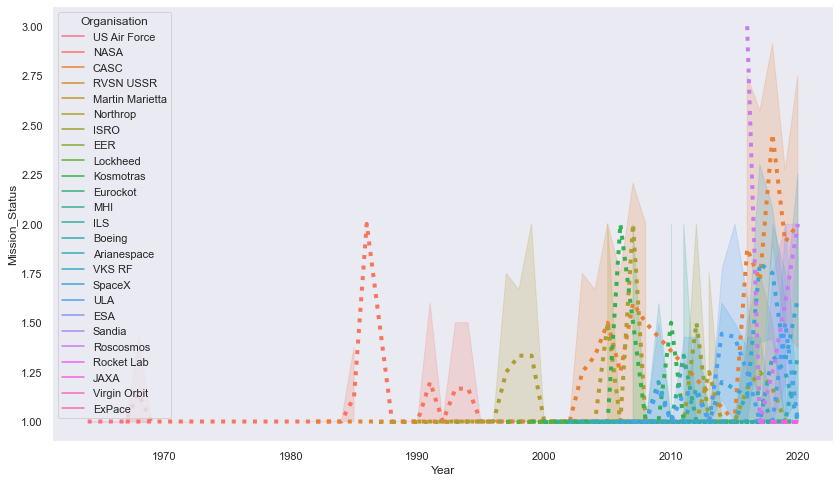

In [318]:
sns.set_theme(style="dark")

plt.figure (figsize = (14, 8))
sns.lineplot (x = 'Year', y = 'Mission_Status', data = df_organization_month, linewidth = 4, hue = 'Organisation', linestyle = 'dotted')
plt.show ()

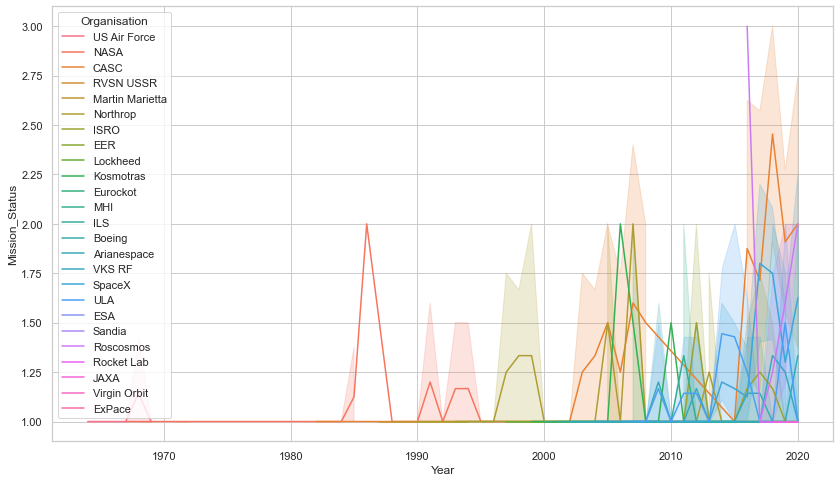

In [319]:
plt.figure (figsize = (14, 8))
with sns.axes_style("whitegrid"):
    sns.lineplot(data=df_organization_month,
               x='Year',
               y='Mission_Status',
               hue='Organisation',)
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [332]:
df_data_clean.loc[(df_data_clean['Year'] > 1991)].groupby(['country'], as_index=False).agg({'Mission_Status': pd.Series.count})

,country,Mission_Status
0,China,149
1,France,95
2,Gran Canaria,2
3,India,67
4,Japan,40
5,Kazakhstan,44
6,New Zealand,13
7,Pacific Missile Range Facility,1
8,Russia,54
9,USA,397


In [333]:
cold_war_USA_Russia = df_data_clean.loc[(df_data_clean['country'] == ' Russia') | (df_data_clean['country'] == ' USA')]

In [334]:
cold_war_USA_Russia = cold_war_USA_Russia.loc[cold_war_USA_Russia['Year'] > 1991]

In [335]:
df_cold_war_month = cold_war_USA_Russia.groupby(['Year','Month','country'], as_index=False).agg({'Mission_Status': pd.Series.count})

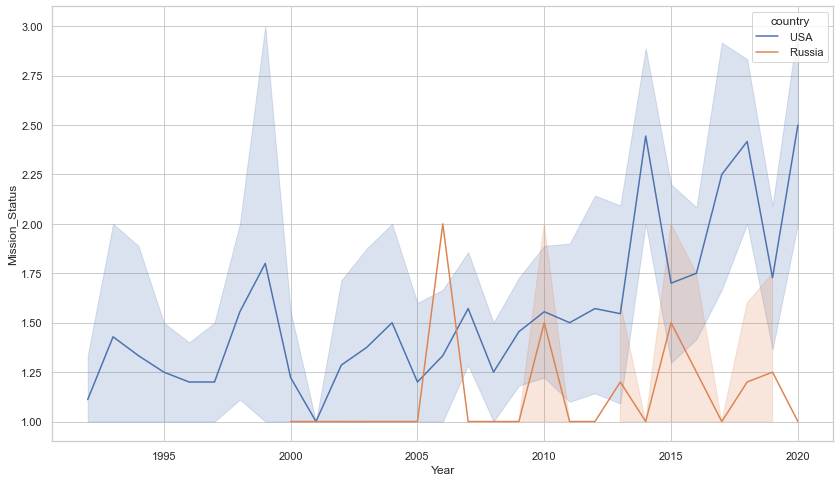

In [336]:
plt.figure (figsize = (14, 8))
with sns.axes_style("whitegrid"):
    sns.lineplot(data=df_cold_war_month,
               x='Year',
               y='Mission_Status',
               hue='country',)
plt.show()

In [337]:
df_cold_war_month

,Year,Month,country,Mission_Status
0,1992,1,USA,1
1,1992,3,USA,1
2,1992,4,USA,1
3,1992,5,USA,1
4,1992,6,USA,1
...,...,...,...,...
293,2020,4,USA,1
294,2020,5,USA,3
295,2020,6,USA,3
296,2020,7,USA,3


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

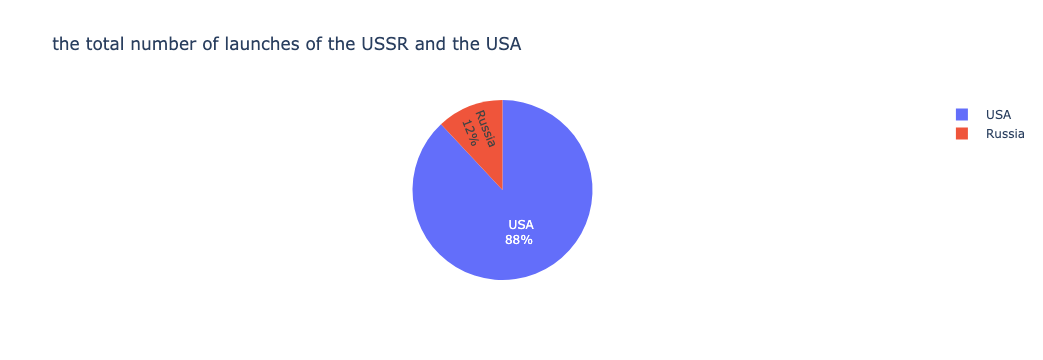

In [347]:
fig = px.pie(df_cold_war_month, values='Mission_Status', names='country',
             title='the total number of launches of the USSR and the USA',
             )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [350]:
df_cold_war_year = df_cold_war_month.groupby(['Year','country'], as_index=False).agg({'Mission_Status': pd.Series.count})

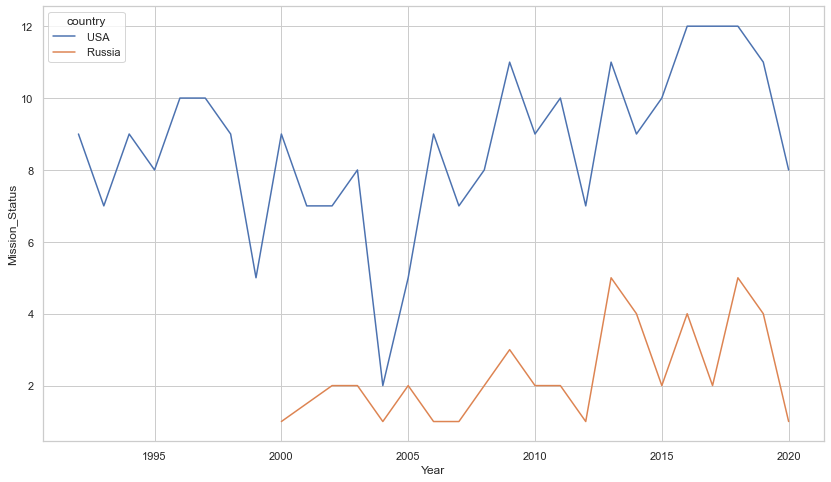

In [372]:
plt.figure (figsize = (14, 8))
with sns.axes_style("whitegrid"):
    sns.lineplot(data=df_cold_war_year,
               x='Year',
               y='Mission_Status',
               hue='country',)
plt.show()

## Chart the Total Number of Mission Failures Year on Year.

In [373]:
df_failure_year = df_data_clean.loc[(df_data_clean['country'] == ' Russia') | (df_data_clean['country'] == ' USA')]

In [374]:
df_failure_year = df_failure_year.groupby(['Year','country'], as_index=False).agg({'Mission_Status': pd.Series.count})

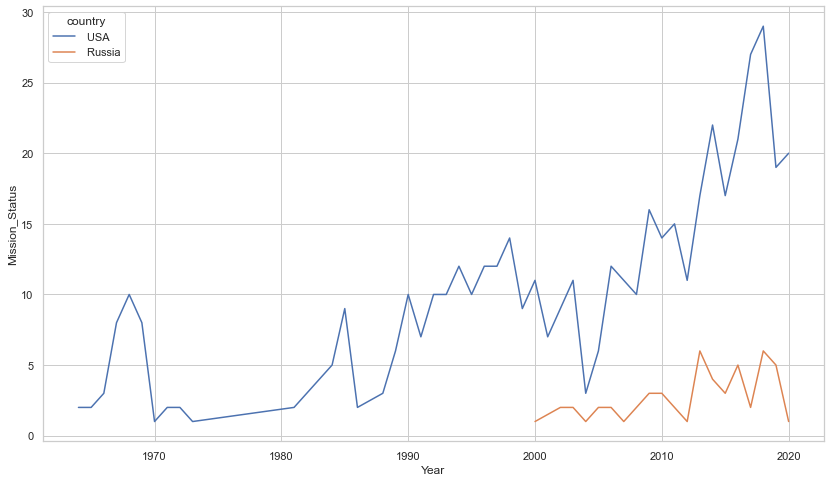

In [375]:
plt.figure (figsize = (14, 8))
with sns.axes_style("whitegrid"):
    sns.lineplot(data=df_failure_year,
               x='Year',
               y='Mission_Status',
               hue='country',)
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [380]:
df_failure_total = df_data_clean.groupby(['Year'], as_index=False).agg({'Mission_Status': pd.Series.count})

In [385]:
df_failure = df_data_clean.loc[(df_data_clean['Mission_Status'] == 'Failure')]

In [387]:
df_failure = df_failure.groupby(['Year'], as_index=False).agg({'Mission_Status': pd.Series.count})

In [389]:
df_failure_total['Failure_rate'] = df_failure['Mission_Status'] / df_failure_total['Mission_Status']

In [392]:
df_failure_total.fillna(0)

,Year,Mission_Status,Failure_rate
0,1964,2,0.50
1,1965,2,0.50
2,1966,3,0.33
3,1967,8,0.12
4,1968,10,0.20
5,1969,8,0.12
6,1970,1,2.00
7,1971,2,0.50
8,1972,2,0.50
9,1973,1,1.00


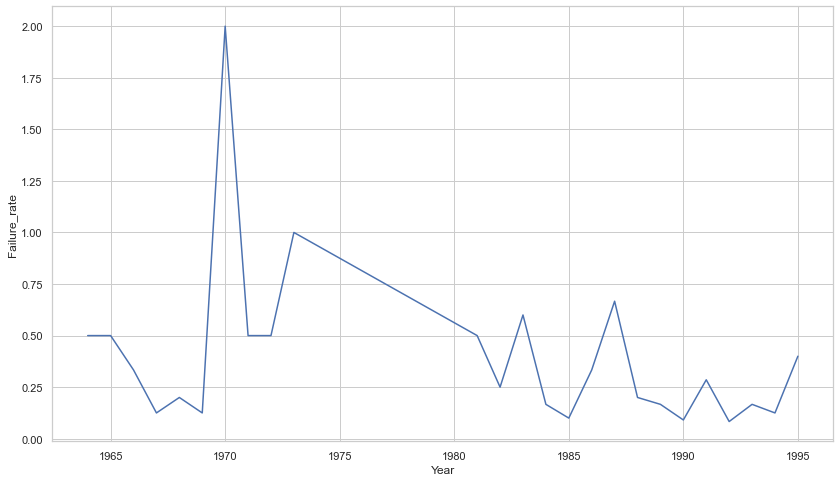

In [393]:
plt.figure (figsize = (14, 8))
with sns.axes_style("whitegrid"):
    sns.lineplot(data=df_failure_total,
               x='Year',
               y='Failure_rate',
               )
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [394]:
df_leading_countries = df_data_clean.loc[df_data_clean['Year'] < 2021]

In [396]:
df_leading_countries = df_leading_countries.groupby(['Year', 'country'], as_index=False).agg({'Mission_Status': pd.Series.count})

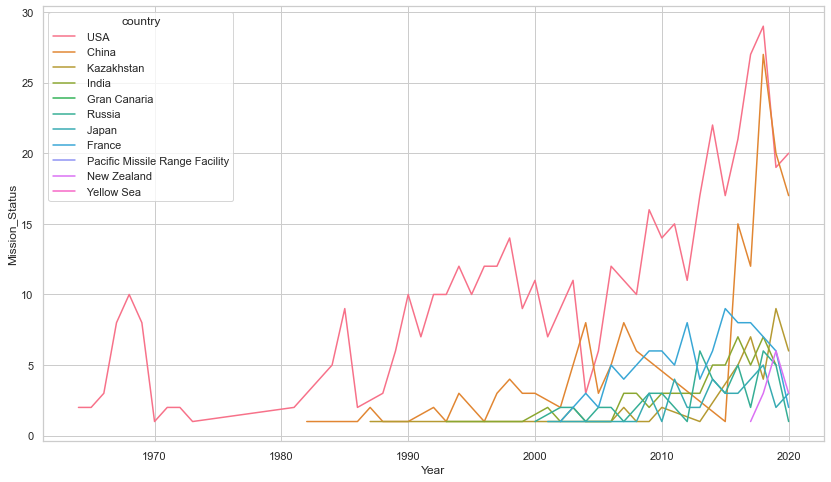

In [400]:
plt.figure (figsize = (14, 8))
with sns.axes_style("whitegrid"):
    sns.lineplot(data=df_leading_countries,
               x='Year',
               y='Mission_Status',
                 hue ='country'
               )
plt.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [401]:
df_organization_year = df_data_clean.groupby(['Year', 'Organisation'], as_index=False).agg({'Mission_Status': pd.Series.count})

In [402]:
df_organization_year

,Year,Organisation,Mission_Status
0,1964,US Air Force,2
1,1965,US Air Force,2
2,1966,US Air Force,3
3,1967,NASA,1
4,1967,US Air Force,7
...,...,...,...
263,2020,Roscosmos,4
264,2020,SpaceX,13
265,2020,ULA,4
266,2020,VKS RF,1


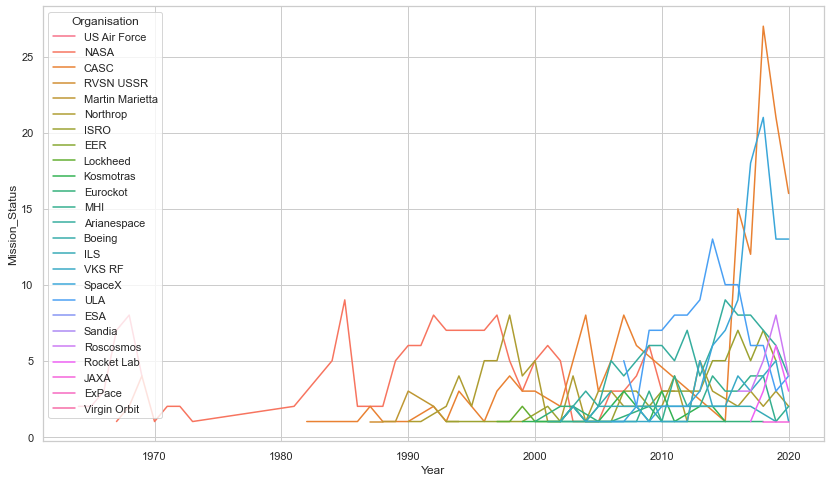

In [403]:
plt.figure (figsize = (14, 8))
with sns.axes_style("whitegrid"):
    sns.lineplot(data=df_organization_year,
               x='Year',
               y='Mission_Status',
                 hue ='Organisation'
               )
plt.show()